In [29]:
import clean_data
import feature_selection as fs
import modeling_2 as model
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import SelectFromModel

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load and Prep Data

In [30]:
MAX_FEATURES = 20
TARGET = 'MD_EARN_WNE_P6'

In [31]:
df = clean_data.runAll()

In [4]:
df.describe()

,ADM_RATE,AGEGE24,AGE_ENTRY,AVGFACSAL,COSTT4_A,COSTT4_P,D150_4_AIANOLD,D150_4_HISPOLD,D150_L4_AIANOLD,D150_L4_HISPOLD,...,ICLEVEL_2.0,ICLEVEL_3.0,OPENADMP_0.0,OPENADMP_1.0,OPENADMP_2.0,OPENADMP_3.0,OPEFLAG_0.0,Year,MD_EARN_WNE_P6,UNITID
count,3.033400e+04,3.033400e+04,3.033400e+04,3.033400e+04,3.033400e+04,3.033400e+04,3.033400e+04,3.033400e+04,3.033400e+04,3.033400e+04,...,30334.000000,30334.000000,30334.000000,30334.000000,30334.000000,30334.000000,30334.0,30334.000000,30334.000000,30334.000000
mean,1.365618e-15,4.754734e-16,8.994805e-16,1.049394e-16,-3.747835e-18,-1.366086e-15,-8.500681e-17,1.419756e-16,-1.405438e-17,-1.218046e-17,...,0.360618,0.140074,0.026208,0.500824,0.470495,0.002472,1.0,2009.319312,10.229866,199849.105624
std,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,...,0.480188,0.347069,0.159757,0.500008,0.499137,0.049663,0.0,3.670705,0.347367,73500.366577
min,-4.865736e+00,-3.548477e+00,-2.229200e+00,-3.356854e+00,-2.341810e+00,-6.473461e+00,-6.395038e-01,-6.609328e-01,-7.760948e-01,-9.306541e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,2003.000000,8.853665,100654.000000
25%,8.036755e-16,5.178915e-16,-7.832814e-01,-5.696017e-01,-3.272996e-01,-1.404984e-15,-1.018216e-16,1.457312e-16,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,2007.000000,10.021271,152309.000000
50%,8.036755e-16,5.178915e-16,-1.032439e-02,0.000000e+00,0.000000e+00,-1.404984e-15,-1.018216e-16,1.457312e-16,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,2011.000000,10.236382,190597.000000
75%,4.438647e-02,5.178915e-16,6.544231e-01,3.674535e-01,0.000000e+00,-1.404984e-15,-1.018216e-16,1.457312e-16,0.000000e+00,0.000000e+00,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.0,2013.000000,10.451609,221759.000000
max,2.373130e+00,5.594437e+00,5.979216e+00,1.056773e+01,4.535198e+00,2.272706e+01,4.579009e+01,4.554775e+01,7.956608e+01,3.794711e+01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,2014.000000,11.802606,428444.000000


In [32]:
df_no_id = df.drop('UNITID', axis=1)

## Run RF with default arguments

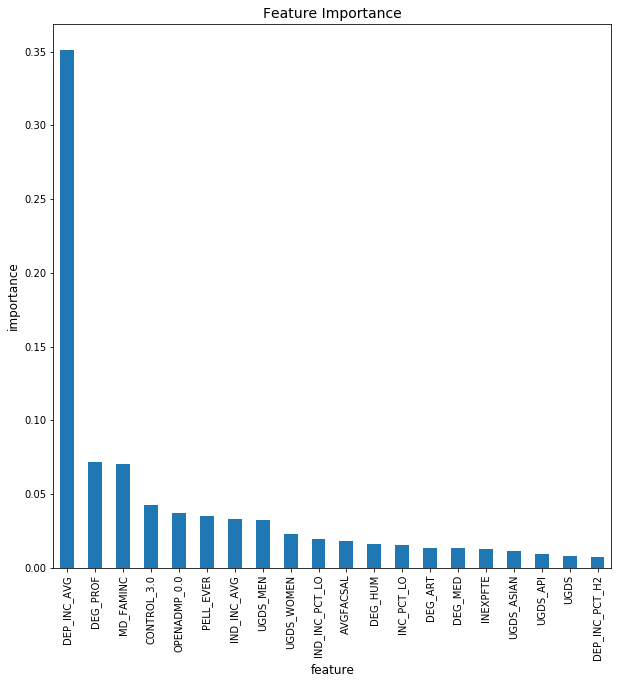

In [33]:
train, test = model.sampling_data(df_no_id)
x_train, y_train, x_test, y_test = model.split_data(train, test, TARGET)

est = 20
sel = model.RF

naive_rf_feature_importance, naive_rf, naive_rf_preds = model.run_model(x_train, y_train, x_test, est, sel)

imp_features = model.graph_feature_importance(naive_rf_feature_importance, x_train)

## Run RF with top MAX_FEATURES

In [14]:
# Create a selector object that will use the random forest classifier with a maximum number of features
sfm = SelectFromModel(naive_rf, max_features=MAX_FEATURES)

# Train the selector
sfm.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                                criterion='mse', max_depth=None,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                max_samples=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=20, n_jobs=None,
                                                oob_score=False,
                                                random_state=None, verbose=0,
                                                warm

In [34]:
sfm.get_support(indices=True)

array([  3,  11,  25,  28,  31,  34,  36,  56,  65,  69,  70,  75,  81,
        89,  90,  91,  92,  94, 172, 181])

In [36]:
# Create df with top features. Append year and target variable.
year_index = df.columns.get_loc("Year")
target_index = df.columns.get_loc(TARGET)

n_df = df_no_id.iloc[:, np.append(sfm.get_support(indices=True), [year_index, target_index])]

In [37]:
train, test = model.sampling_data(n_df)
x_train, y_train, x_test, y_test = model.split_data(train, test, TARGET)

est = 20
sel = model.RF

naive_rf_feature_importance, naive_rf, naive_rf_preds = model.run_model(x_train, y_train, x_test, est, sel)

## Evaluation

In [43]:
mean_squared_error(y_test, naive_rf_preds)

0.0020192049204413

In [47]:
import numpy as np
mean_absolute_error(np.exp(y_test), np.exp(naive_rf_preds))

887.4785546649709